<a href="https://colab.research.google.com/github/tdushio/shiolabOpen/blob/master/35_%E3%83%A2%E3%83%87%E3%83%AB%E8%BF%BD%E5%BE%93%E5%9E%8B%E3%83%AD%E3%83%90%E3%82%B9%E3%83%88%E3%82%B5%E3%83%BC%E3%83%9C%E7%B3%BB%EF%BC%88MFS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 35.モデル追従型ロバストサーボ系（MFS）

ステップ状目標信号に対するサーボ系を拡張して、
規範モデルの出力に追従するモデル追従型サーボ系(Model Following System: MFS)
を構成する。

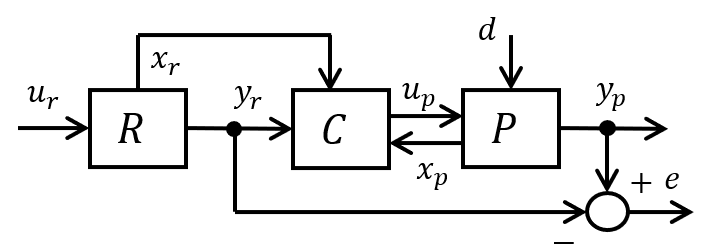

## 制御対象のモデル

制御対象を
$1$ 入力$1$出力$4$次の線形時不変システム(LTI)で与える。<br>
\begin{equation}
   \dot{x}_p(t) = A_p x_p(t) + B_p u_p(t) + G d(t)   \nonumber \\
    y_p(t) = C_p x_p(t)  
\end{equation}
参照モデル（規範モデル）を以下のように
$1$ 入力$1$出力$2$次の線形時不変システム(LTI)で与える。
\begin{equation}
   \dot{x}_r(t) = A_r x_r(t) + B_r u_r(t)  \nonumber \\
    y_r(t) = C_r x_r(t) + D_r u_r(t)  
\end{equation}
２システムの出力偏差$e$を以下のように置く。
\begin{equation}
    e(t) = y_p(t) - y_r(t)
\end{equation}

ここで、$x_p(t)\in{\mathrm R}^{n_p}$は制御対象の状態
$u_p(t)\in{\mathrm R}$制御対象への入力、
$x_r(t)\in{\mathrm R}^{n_r}$は規範モデルの状態
$u_r(t)\in{\mathrm R}$規範モデルへの入力である。

制御目的は、
制御対象の出力$y_p(t)\in{\mathrm R^{p}$を
規範モデルの出力$y_r(t)\in{\mathrm R^{p}$に追従させることである。

ここで、
$d(t)$ と規範モデルの入力$u_r(t)$はステップ状信号
であると仮定する。すなわち
1.   $\dot{d}(t)=0,\; t>0$
2.   $\dot{r}(t)=0,\; t>0$
である。

## 制御の目的(目標値追従型ロバストサーボ問題)

この制御対象と外乱および規範モデルに対し、
$e(t) = y(t)-r(t)\to 0$
となる制御系を構成する。
これをステップ状外乱に対する
モデル追従型のロバストサーボ問題(MFS)と呼ぶ。

## 拡大系による問題の変形

偏差$e$の時間積分を$\eta$とおく。
つまり、$\dot{\eta}=e$である。
拡大系の状態変数 $x_b$ を以下のように定義する。
\begin{equation}
    x_b =
    \left[ \begin{array}{c} x_p \\ \eta \\ x_r \end{array} \right]
\end{equation}

この定義にもとづくと、拡大系は
\begin{equation}
   \dot{x}_b(t) =
   \left[ \begin{array}{rrr} A_p & 0 & 0 \\ C_p & 0 & -C_r
        \\ 0 & 0 & A_r \end{array} \right] x_b(t)
+    \left[ \begin{array}{c} B_p \\ 0 \\ 0 \end{array} \right] u_p(t)
+     \left[ \begin{array}{rr} G & 0 \\ 0 & -D_r \\ 0 & B_r \end{array} \right]
      \left[ \begin{array}{c} d(t) \\ u_r(t) \end{array} \right] \\
      \eta(t) =  [O, I,O]x_b
\end{equation}
となる。

ここで $x_a$を
\begin{equation}
    x_a = \dot{x}_b
    = \left[ \begin{array}{c} \dot{x}_p \\ \dot{\eta} \\ \dot{x}_r  \end{array} \right]
    = \left[ \begin{array}{c} \dot{x}_p \\ e \\ \dot{x}_r  \end{array} \right]
\end{equation}
と定義し、拡大系の両辺を$t$で微分すると
$\dot{t}$を入力とした以下の状態空間モデルが得られる。
\begin{equation}
   \dot{x}_a(t) =
   \left[ \begin{array}{rrr} A_p & 0 & 0 \\ C_p & 0 & -C_r
        \\ 0 & 0 & A_r \end{array} \right] x_a(t)
+    \left[ \begin{array}{c} B_p \\ 0 \\ 0 \end{array} \right] \dot{u}_p(t)
 \\
      e(t) =  [O, I, O]x_b(t)
\end{equation}
という$d,r$を含まない拡大系が得られる。
この拡大系は可観測であるが可制御ではないことに注意されたい。
すなわち規範モデルの状態は問題設定から不可制御である。
しかし、$A_r$が安定であれば系は可安定なので、
以下のLQR問題は解を持つ。

この拡大系に対して評価関数を
\begin{equation}
  J = \int_0^\infty
  \left( \|x_a(t)\|^2_Q + \|\dot{u}(t)\|^2_R\
  \right)  \mathrm{d}t
\end{equation}
とおいたLQR問題を解いて、状態フィードバック則
\begin{equation}
    \dot{u}_p = -K x_a = -K_1 \dot{x}_p-K_2 e -K_3 \dot{x}_r
\end{equation}
が得られたとすると、この両辺を$t$で積分することにより
\begin{equation}
    u_p(t) = -K_1 x_p(t) - K_2 \int^t e(\tau){\mathrm d}\tau
             -K_3 x_r(t)
\end{equation}
というPIフィードバック+フィードフォワード制御則が得られる。
評価関数が有界であるためには $e(t)\to 0$は必要条件であり、
この問題が可解であれば、上記のロバストサーボ問題は可解であることがわかる。

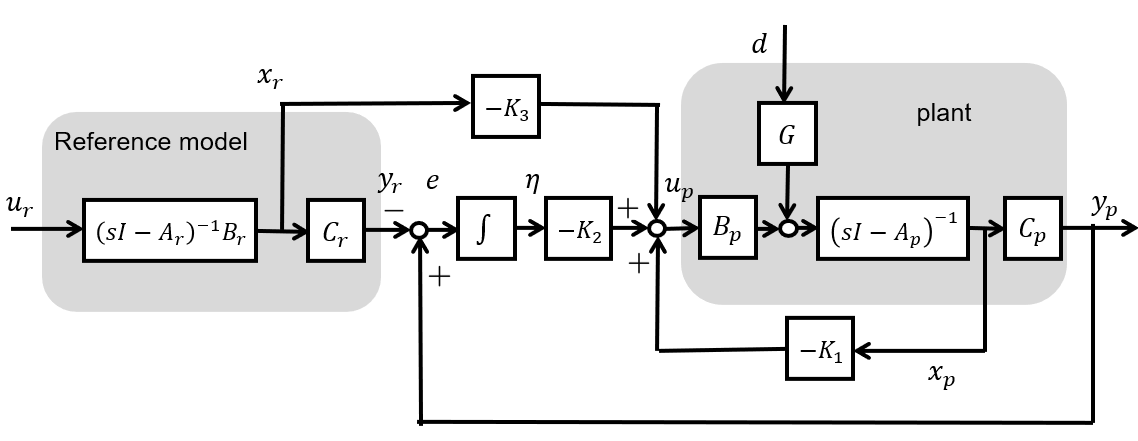



# モジュールのインストール
以下のライブラリを使用する。


*   numpy
*   matplotlib
*   control (制御工学ライブラリ)


### <参考>
<A href="https://python-control.readthedocs.io/en/0.10.0/">制御工学モジュール control のドキュメント</a><br>
<A href="https://numpy.org/doc">numpy のドキュメント</A><br>
<A href="https://matplotlib.org/stable/index.html">matplotlib のドキュメント</A><br>


In [1]:
import numpy as np
import cvxpy as cp
# !pip install slycot
!pip install control
from control import matlab   # matlab 互換関数を使用する場合
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 9.8 MB/s eta 0:00:00


# プログラム

1. 制御対象のモデル
2. 拡大系を作る
3. 解の存在条件を確認する
4. 状態フィードバックゲインを求める
5. シミュレーション




# 制御対象のモデル
制御対象として倒立振子のモデルを
$1$ 入力$1$出力$4$次の線形時不変システム(LTI)で与える。<br>
\begin{equation}
   \dot{x}_p(t) = A_p x_p(t) + B_p u_p(t) + G d(t)   \nonumber \\
    y_p(t) = C_p x_p(t)  
\end{equation}
これに対して参照モデル（規範モデル）を以下のように
$1$ 入力$1$出力$2$次の線形時不変システム(LTI)で与える。
\begin{equation}
   \dot{x}_r(t) = A_r x_r(t) + B_r u_r(t)  \nonumber \\
    y_r(t) = C_r x_r(t) + D_r u_r(t)  
\end{equation}
２システムの出力偏差$e$を以下のように置く。
\begin{equation}
    e(t) = y_p(t) - y_r(t)
\end{equation}


制御対象に関わる物理量

In [2]:
l = 0.15             # 振子の長さ
m = 0.0402           # 振子の質量
Jp = 0.00030142      # 振子の慣性モーメント
M = 0.6862           # 台車の質量
Jt = 1.34 * 10**(-4)
Jm = 1.30 * 10**(-7)
Jc = Jt + Jm
r = 0.02485
F = 0.36
c = 0.0015
g = 9.80665
a = 1.9

p = M + m + Jc/(r*r)
q = Jp + m*l*l
W = 1/(p * q - m * m * l * l)


制御対象の係数行列の作成

In [3]:
Ap = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, -m*m*g*l*l*W, -F*q*W, c*m*l*W],
    [0, m*g*l*p*W, F*m*l*W, -c*p*W]
    ])
Bp = np.array([[0, 0, a*q*W, -a*m*l*W]]).T
Cp = np.array([[1, 0, 0, 0]])
Dp = np.zeros((1, 1))
G = Bp

sysP = matlab.ss(Ap, Bp, Cp, Dp)                # 制御対象のオブジェクトを定義する
print(sysP)
matlab.poles(sysP)

<StateSpace>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
     [ 0.00000000e+00 -3.23705297e-01 -3.94108231e-01  8.21113282e-03]
     [ 0.00000000e+00  5.06551367e+01  1.97067188e+00 -1.28492199e+00]]

B = [[  0.        ]
     [  0.        ]
     [  2.08001566]
     [-10.40076824]]

C = [[1. 0. 0. 0.]]

D = [[0.]]



array([ 0.        +0.j, -7.79586022+0.j,  6.49830896+0.j, -0.38147896+0.j])

## 規範モデルの係数行列



In [4]:
wn = 1.0
zeta = 0.7
k = 1.0
Ar = np.matrix([
    [0, 1],
    [-wn*wn, -2*zeta*wn]
    ])
Br = np.matrix([[0, k*wn*wn]]).T
Cr = np.matrix([[1, 0]])
Dr = np.matrix([[0]])

sysR = matlab.ss(Ar, Br, Cr, Dr)                # 制御対象のオブジェクトを定義する
print(sysR)

<StateSpace>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.   1. ]
     [-1.  -1.4]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]



## 拡大系を作る

偏差$e$の時間積分を$\eta$とおく。
つまり、$\dot{\eta}=e$である。
拡大系の状態変数 $x_b$ を $\dot{x}_b = x_a$ で定義し
\begin{equation}
    x_b =
    \left[ \begin{array}{c} x_p \\ \eta \\ x_r \end{array} \right]
    = \left[ \begin{array}{ccccc}
    z & \theta & \dot{z} & \dot{\theta} & \eta & x_{r}^1 & x_{r}^2 \end{array} \right]^\top
\end{equation}
と書くこととする。

この定義にもとづくと、拡大系は
\begin{equation}
   \dot{x}_b(t) =
   \left[ \begin{array}{rrr} A_p & 0 & 0 \\ C_p & 0 & -C_r
        \\ 0 & 0 & A_r \end{array} \right] x_b(t)
+    \left[ \begin{array}{c} B_p \\ 0 \\ 0 \end{array} \right] u_p(t)
+     \left[ \begin{array}{rr} G & 0 \\ 0 & -D_r \\ 0 & B_r \end{array} \right]
      \left[ \begin{array}{c} d(t) \\ u_r(t) \end{array} \right] \\
      \eta(t) =  [0,0,0,0,1,0,0]x_b
\end{equation}
となる。


In [5]:
n1 = Ap.shape[0]
p1 = Cp.shape[0]
m1 = Bp.shape[1]
n2 = Ar.shape[0]
p2 = Cr.shape[0]
m2 = Br.shape[1]

Z41 = np.ma.zeros((n1,p1))
Z42 = np.ma.zeros((n1,n2))
Z11 = np.ma.zeros((p1,p1))
Z14 = np.ma.zeros((p1,n1))
Z24 = np.ma.zeros((n2,n1))
Z21 = np.ma.zeros((n2,p2))

Aa = np.bmat([[Ap, Z41, Z42],[Cp, Z11, -Cr],[Z24, Z21, Ar]])
Ba = np.bmat([[Bp],[Dp],[Z21]])
Ca = np.matrix([[0,0,0,0,1,0,0]])
Da = np.ma.zeros((p1,m1))
Ga = np.bmat([[G, Z41],[Z11,-Dr],[Z21, Br]])

sys_aug = matlab.ss(Aa, Ba, Ca, Da)
print(sys_aug)
print(Ga)

<StateSpace>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (7): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]', 'x[6]']

A = [[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
       0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
       0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00 -3.23705297e-01 -3.94108231e-01  8.21113282e-03
       0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  5.06551367e+01  1.97067188e+00 -1.28492199e+00
       0.00000000e+00  0.00000000e+00  0.00000000e+00]
     [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       0.00000000e+00 -1.00000000e+00  0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       0.00000000e+00  0.00000000e+00  1.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       0.00000000e+00 -1.00000000e+00 -1.40000

# 解の存在条件を確認する

## サーボ条件を確認する


In [6]:
S = np.bmat([[Aa,Ba],[Ca,Da]])
print(S)
rank = np.linalg.matrix_rank(S)
print(rank)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.23705297e-01 -3.94108231e-01  8.21113282e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.08001566e+00]
 [ 0.00000000e+00  5.06551367e+01  1.97067188e+00 -1.28492199e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.04007682e+01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.00000000e+00 -1.40000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

## 可制御性条件を確認する


In [24]:
Mc = np.asmatrix(Ba)
Aa = np.asmatrix(Aa)
Mc = np.bmat([Ba, (Aa*Mc)])
Mc = np.bmat([Ba, (Aa*Mc)])
Mc = np.bmat([Ba, (Aa*Mc)])
Mc = np.bmat([Ba, (Aa*Mc)])
Mc = np.bmat([Ba, (Aa*Mc)])
Mc = np.bmat([Ba, (Aa*Mc)])
print(Mc)
print(Mc.shape)
rank = np.linalg.matrix_rank(Mc)
print(rank)
na = n1+p1+n2
if rank == na:
  print('Controllable')
else:
  print('Not controllable')
  U,S,Vh = np.linalg.svd(Mc)
  SS = np.matrix([]).reshape((7,0));
  for i in range(na):
    if(S[i]<1e-10):
      SS = np.bmat([SS, U[:,i]])
  print(SS)

[[ 0.00000000e+00  2.08001566e+00 -9.05153382e-01  3.86690486e+00
  -1.17018604e+01  1.96138036e+02 -8.41613977e+02]
 [ 0.00000000e+00 -1.04007682e+01  1.74632042e+01 -5.51074953e+02
   1.60030973e+03 -2.99941107e+04  1.19990524e+05]
 [ 2.08001566e+00 -9.05153382e-01  3.86690486e+00 -1.17018604e+01
   1.96138036e+02 -8.41613977e+02  1.10261977e+04]
 [-1.04007682e+01  1.74632042e+01 -5.51074953e+02  1.60030973e+03
  -2.99941107e+04  1.19990524e+05 -1.67519279e+06]
 [ 0.00000000e+00  0.00000000e+00  2.08001566e+00 -9.05153382e-01
   3.86690486e+00 -1.17018604e+01  1.96138036e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
(7, 7)
5
Not controllable
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]]


## 可観測条件を確認する

In [8]:
Mo = Ca
Mo = np.bmat([[Ca],[Mo@Aa]])
Mo = np.bmat([[Ca],[Mo@Aa]])
Mo = np.bmat([[Ca],[Mo@Aa]])
Mo = np.bmat([[Ca],[Mo@Aa]])
Mo = np.bmat([[Ca],[Mo@Aa]])
Mo = np.bmat([[Ca],[Mo@Aa]])
rank = np.linalg.matrix_rank(Mo)
print(rank)
if rank==n1+p1+n2:
  print('Observable')
else:
  print('Not observable')

7
Observable


# 状態フィードバックゲインを求める
LQR問題としてリッカチ方程式を解き、状態フィードバックゲインを求める

In [9]:
Q = np.diag(np.array([0,0,0,0,1,0,0]))
R = np.array([[1]])
K,P,E = matlab.lqr(sys_aug,Q,R)      # matlab.lqr() を使用した場合
# P,L,G = matlab.care(Aa,Ba,Q,R)        # matlab.care() を使用した場合
# K =  np.linalg.inv(R)@Ba.T@P
print(K)
print(E)

[[ -1.90380394 -14.40522139  -2.0017084   -1.85972355  -1.
    1.29088105   0.68776918]]
[-7.79586314+0.j         -6.4983135 +0.j         -0.64095315+1.0769237j
 -0.64095315-1.0769237j  -1.28191615+0.j         -0.7       +0.71414284j
 -0.7       -0.71414284j]


# シミュレーション
## 閉ループ系の構成
拡大系に状態フィードバック
\begin{equation}
  u_p(t) = -Kx_b(t) = -K_1 x_p(t) -K_2 \eta(t) -K_3 x_r(t)
\end{equation}
を組み込んで得られる閉ループ系は以下で与えられる.
\begin{equation}
   \dot{x}_b(t) =
   \left[ \begin{array}{cc} A-B K_1 & B K_2 \\
              C-DK_1 & D K_2 \end{array} \right] x_b(t)
+     \left[ \begin{array}{rr} G & 0 \\ 0 & -1 \end{array} \right]
      \left[ \begin{array}{c} d(t) \\ u_r(t) \end{array} \right]
\end{equation}
ここでは $z,\theta$を出力信号として取り出す。
\begin{equation}
    \left[ \begin{array}{c} y_p(t) \\ \theta(t) \\ y_r(t) \end{array} \right] =
    \left[ \begin{array}{cc} 1&0&0&0&0&0&0 \\
                             0&1&0&0&0&0&0 \\
                             0&0&0&0&0&1&0 \end{array} \right] x_b(t)
\end{equation}

In [10]:
A_ = Aa - Ba * K
B_ = Ga
C_  = np.matrix([[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,0,0,0,1,0]])
D_  = np.matrix([[0,0],[0,0],[0,0]])

sys_cl = matlab.ss(A_, B_, C_, D_)       # 閉ループ系の状態空間モデル
print(sys_cl)

<StateSpace>: sys[3]
Inputs (2): ['u[0]', 'u[1]']
Outputs (3): ['y[0]', 'y[1]', 'y[2]']
States (7): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]', 'x[6]']

A = [[  0.           0.           1.           0.           0.
        0.           0.        ]
     [  0.           0.           0.           1.           0.
        0.           0.        ]
     [  3.959942    29.63938081   3.76947659   3.87646525   2.08001566
       -2.68505281  -1.43057067]
     [-19.80102352 -99.17023252 -18.84863326 -20.62747569 -10.40076824
       13.42615466   7.15332788]
     [  1.           0.           0.           0.           0.
       -1.           0.        ]
     [  0.           0.           0.           0.           0.
        0.           1.        ]
     [  0.           0.           0.           0.           0.
       -1.          -1.4       ]]

B = [[  0.           0.        ]
     [  0.           0.        ]
     [  2.08001566   0.        ]
     [-10.40076824   0.        ]
     [  0.          

## 時間応答の観察
matlab.lsimで、目標値追従特性と外乱除去特性を観察する.

In [11]:
# 目標値追従特性と外乱除去特性を観察する
Td = np.arange(0, 50, 0.05)    #シミュレーション時間
N = len(Td)
N1 = int(N/5)
N2 = int(2*N/5)
N3 = int(3*N/5)
N4 = int(4*N/5)
d = np.zeros(N).reshape((1,N))
d[0,N1:N2] = np.ones(N2-N1)
r = np.zeros(N).reshape((1,N))
r[0,N3:N4] = np.ones(N4-N3)

# u = np.append(d,r,axis=0).reshape((2,N))
u = np.bmat([[d],[r]]).T

x0 = np.array([0.2,0,0,0,0,0,0]).reshape((7,1))
y, t, x = matlab.lsim(sys_cl, u, Td, x0 )
yp = y[:,0]
e = yp - r.squeeze()
th = y[:,1]
yr = y[:,2]


応答波形を描画する

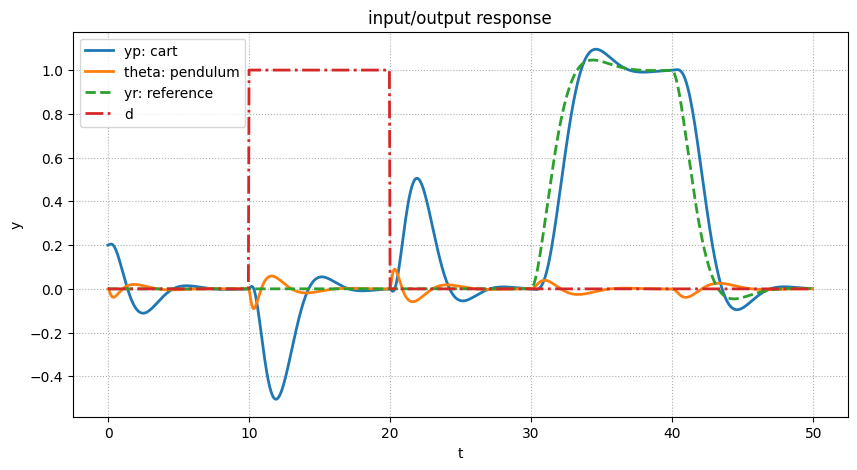

In [12]:
# 初期値応答の描画
fig, ax = plt.subplots(figsize=(10,5))
r = r.squeeze()
d = d.squeeze()
ax.plot(t, yp,  ls = '-',  lw = 2.0, label = 'yp: cart')
ax.plot(t, th, ls = '-',  lw = 2.0, label = 'theta: pendulum')
# ax.plot(t, e, ls = '-',  lw = 2.0, label = 'e: position error')
ax.plot(t, yr, ls = '--', lw = 2.0, label = 'yr: reference')
ax.plot(t, d, ls = '-.', lw = 2.0, label = 'd')
ax.set_title('input/output response')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid(ls=':')
ax.legend(loc='best')
plt.show()

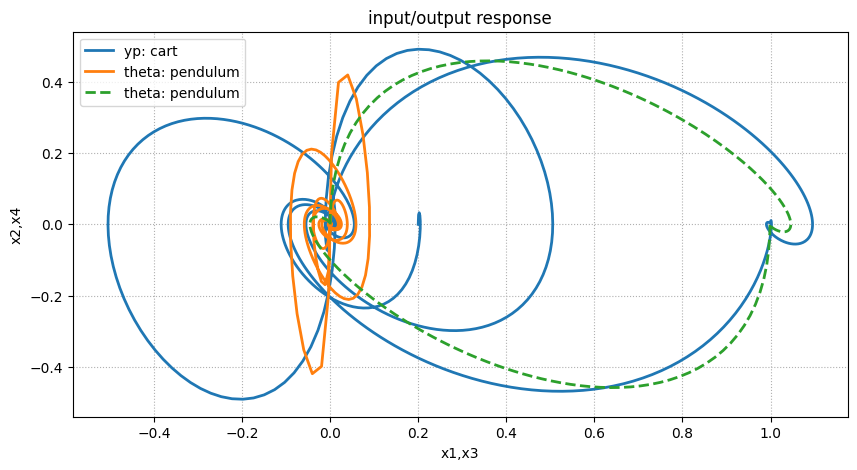

In [13]:
# 初期値応答の描画
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x[:,0], x[:,2],  ls = '-',  lw = 2.0, label = 'yp: cart')
ax.plot(x[:,1], x[:,3], ls = '-',  lw = 2.0, label = 'theta: pendulum')
ax.plot(x[:,5], x[:,6], ls = '--',  lw = 2.0, label = 'theta: pendulum')
ax.set_title('input/output response')
ax.set_xlabel('x1,x3')
ax.set_ylabel('x2,x4')
ax.grid(ls=':')
ax.legend(loc='best')
plt.show()